### Laboratorio #1
### Detección de objetos

#### Denis Alexis Solis
#### 20 000 143

In [10]:
# Importamos las librerías a utilizar
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

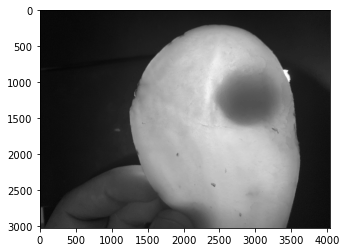

In [8]:
img = cv2.imread("papa5.jpg", cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread("papa.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = "gray")
img = cv2.resize(img, (450, 300)) 
(thresh, img) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [148]:
def binario(img):    
    img = cv2.imread(img)
    salidaB = np.zeros(img.shape)
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    
    # Imagen en escala de grises
    img_gray = 0.21*R + 0.71*G + 0.07*B
    
    # Imagen blanco y negro
    (thresh, blanco_negro) = cv2.threshold(img_gray, 130, 255, cv2.THRESH_BINARY)
    
    cv2.imwrite("papa_binario.jpg", blanco_negro)
    imgResultado1 = cv2.imread("papa_binario.jpg")
    return imgResultado1

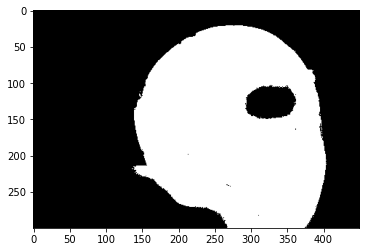

In [149]:
plt.imshow(img, cmap = "gray")

In [150]:
def convolutional_filter(imagen, kernel):
    alto = imagen.shape[0]
    ancho =  imagen.shape[1]
    
    altoKernel = len(kernel[:,0])
    anchoKernel = len(kernel[0,:])

    #parte entera del centro del kernel
    step = int(len(kernel[0,:])/2)

    newImg = np.zeros((alto, ancho, 1))
    
    for i in range(step, alto - step):
        newPixel = 0
        for j in range(step, ancho - step):
            ventana = imagen[i-step:i+2*step, j-step:j+2*step]
            newPixel = 0
            for m in range(0, altoKernel):
                for n in range(0, anchoKernel):
                    newPixel = newPixel + ventana[m, n] * kernel[m, n]
            newImg[i, j] = int(newPixel)
    
    return newImg

In [151]:
# Derivada en x
def derivadaX(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    DerivadaX = np.zeros((alto, ancho, 1))
    
    kernel_gaussiano = np.array([[1/16., 2/16., 1/16.], [2/16., 4/16., 2/16.], [1/16., 2/16., 1/16.]])
    img = convolutional_filter(img, kernel_gaussiano)
    
    for i in range(0, alto):
        for j in range(0, ancho -1):
            derX = img[i, j+1] - img[i, j]
            DerivadaX[i, j] = derX
    return DerivadaX

In [152]:
img_der_x = derivadaX(img)
cv2.imwrite("derX.jpg", img_der_x)

True

In [153]:
def derivadaY(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    DerivadaY = np.zeros((alto, ancho, 1))
    
    kernel_gaussiano = np.array([[1/16., 2/16., 1/16.], [2/16., 4/16., 2/16.], [1/16., 2/16., 1/16.]])
    img = convolutional_filter(img, kernel_gaussiano)
    
    for i in range(0, alto -1):
        for j in range(0, ancho):
            derY = img[i+1, j] - img[i, j]
            DerivadaY[i, j] = derY
    return DerivadaY

In [154]:
img_der_y = derivadaY(img)
cv2.imwrite("derY.jpg", img_der_y)

True

In [155]:
def magnitud(dx, dy):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    salida = np.zeros((alto, ancho, 1))
    
    for i in range(0, alto):
        for j in range(0, ancho):
            mag = math.sqrt(dx[i, j]**2 + dy[i, j]**2)
            salida[i, j] = mag
    return salida

In [156]:
imgMag = magnitud(img_der_x, img_der_y)
cv2.imwrite("Magnitud.jpg", imgMag)

True

In [157]:
def non_maximum_suppression(magImage, phaseImage):
    alto = magImage.shape[0]
    ancho =  magImage.shape[1]
    newImg = np.zeros((alto, ancho,1))
    val1 = 0
    val2 = 0
    val3 = 0
    alpha = 0.1
    for i in range(1, alto - 2):
        for j in range(1, ancho - 2):
            ventana = magImage[i-1:i+2, j-1:j+2]
            angulo = phaseImage[i, j]
            vDerecha = magImage[i - 1, j]
            vIzquierda = magImage[i + 1, j]
            if(((angulo > 337)  or (angulo <= 23)) or ((angulo >= 157) and (angulo <= 203))):
                val1 = ventana[1,0]
                val2 = ventana[1,1]
                val3 = ventana[1,2]
            elif(((angulo > 23) and (angulo <= 67)) or ((angulo > 203) and (angulo <= 248))):
                val1 = ventana[0,2]
                val2 = ventana[1,1]
                val3 = ventana[2,0]
            elif(((angulo > 67) and (angulo <= 113)) or ((angulo > 248) and (angulo <= 293))):
                val1 = ventana[0,1]
                val2 = ventana[1,1]
                val3 = ventana[2,1]
            elif(((angulo > 293) and (angulo <= 337)) or ((angulo > 113) and (angulo <= 157))):
                val1 = ventana[0,0]
                val2 = ventana[1,1]
                val3 = ventana[2,2]
            if((val2 >= val1) and (val2 >= val3)):
                newImg[i, j] = val2
                  #newImg[i,j] = alpha*val1 + (1-alpha)*val3
                  #newImg[i, j] = 255
            else:
                newImg[i, j] = 0
    return newImg

In [158]:
imgNMS = non_maximum_suppression(imgMag, imgFase)
cv2.imwrite("NMS.jpg", imgNMS)

True

In [159]:
def threshhold(img):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    newImg = np.zeros((alto, ancho, 1))
    
    for i in range(0, alto):
        for j in range(0, ancho):
            if(img[i,j] > 15):
                newImg[i,j] = 255
            else:
                newImg[i,j] = 0
                
    return newImg

In [160]:
imgCanny = threshhold(imgNMS)
cv2.imwrite("Canny.jpg", imgCanny)

True

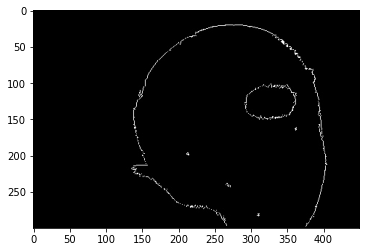

In [161]:
imgBordes = cv2.imread("Canny.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(imgBordes, cmap = "gray")

In [27]:
#Fase
def fase(dx, dy):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    salida = np.zeros((alto, ancho, 1))
    
    for i in range(0, alto):
        for j in range(0, ancho):
            fase = int((180/math.pi)*(math.atan2(dy[i,j], dx[i,j])))
            salida[i, j] = fase
    return salida

In [28]:
imgFase = fase(img_der_x, img_der_y)
cv2.imwrite("Fase.jpg", imgFase)

True

In [3]:
def grises(img):    
    img = cv2.imread(img)
    salidaB = np.zeros(img.shape)
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    
    # Imagen en escala de grises
    img_gray = 0.21*R + 0.71*G + 0.07*B
    
    # Imagen blanco y negro
    #(thresh, blanco_negro) = cv2.threshold(img_gray, 130, 255, cv2.THRESH_BINARY)
    
    cv2.imwrite("papa_gris.jpg", img_gray)
    imgResultado1 = cv2.imread("papa_gris.jpg")
    return imgResultado1

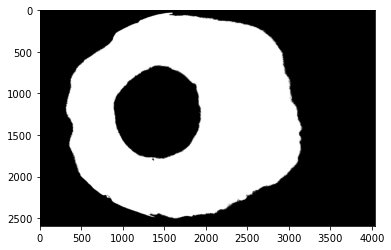

In [21]:
img_gris = grises("papa.jpg")
img_bin = binario("papa.jpg")
img = cv2.imread("papa.jpg")
plt.imshow(img_gris)
plt.imshow(img_bin)


In [6]:
def deteccion_bordes(img):
    img = img
    blurred_img = cv2.GaussianBlur(img,(3,3),0)
    
    plt.figure(figsize=[14,14])
 
    lower_thresh= 0
    upper_thresh= 10
 
    edges = cv2.Canny(img,lower_thresh, upper_thresh)
    edges_on_blurred = cv2.Canny(blurred_img,lower_thresh,upper_thresh)
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    
    wide = cv2.Canny(blurred, 10, 200)
    mid = cv2.Canny(blurred, 30, 150)
    tight = cv2.Canny(blurred, 240, 250)
 
    plt.figure(figsize=[18,18])
    plt.subplot(131);plt.imshow(img[:,:,::-1]);plt.title("Original Image");plt.axis('off');
    plt.subplot(132);plt.imshow(edges, cmap = "gray");plt.title("Edge detection on Img");plt.axis('off');
    plt.subplot(133);plt.imshow(edges_on_blurred, cmap='gray');plt.title("Edge Detection on Blurred Img");plt.axis('off');
    
    plt.figure(figsize=[18,18])
    plt.subplot(121);plt.imshow(wide);plt.title("Original Image");plt.axis('off');
    plt.subplot(122);plt.imshow(mid);plt.title("Edge detection on Img");plt.axis('off')
    
    

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

<Figure size 1008x1008 with 0 Axes>

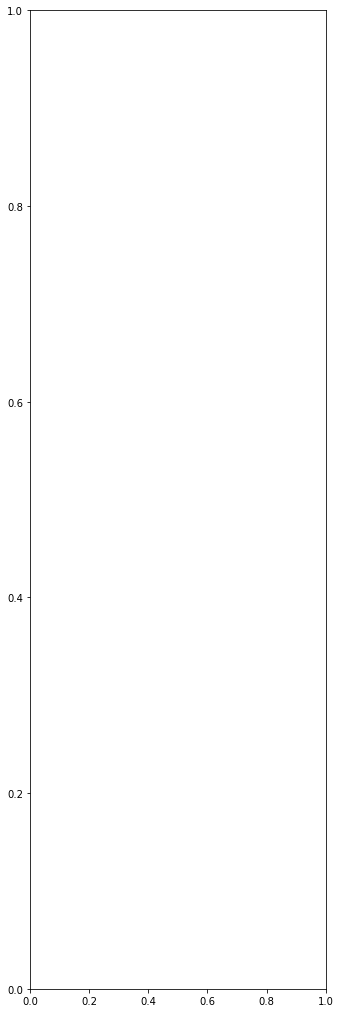

In [7]:
deteccion_bordes(img)

In [23]:
kernel_gauss = np.array([[1/16., 2/16., 1/16.], [2/16., 4/16., 2/16.], [1/16., 2/16., 1/16.]])

#kernel lapaciano
kernel_lap = np.array([[0., -1., 0.], [-1., 4., -1.], [0., -1., 0.]])

#kernel sharp
kernel_sharp = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
#kernel_sharp = np.array([[-1/16, -2/16, -1/16], [-2/16, 12, -2/16], [-1/16, -2/16, -1/16]])


In [23]:
#plt.imshow(img, cmap = "gray")
edges = cv2.Canny(img, 100, 200)
cv2.imwrite("Canny.jpg", edges)

True

In [65]:
def non_maximum_suppression(magImage, phaseImage):
    alto = magImage.shape[0]
    ancho =  magImage.shape[1]    
    newImg = np.zeros((alto, ancho,1))
    val1 = 0
    val2 = 0
    val3 = 0
    alpha = 0.1
    for i in range(1, alto - 2):
        for j in range(1, ancho - 2):
            ventana = magImage[i-1:i+2, j-1:j+2]
            angulo = phaseImage[i, j]
            vDerecha = magImage[i - 1, j]
            vIzquierda = magImage[i + 1, j]
            if(((angulo > 337)  or (angulo <= 23)) or ((angulo >= 157) and (angulo <= 203))):
                val1 = ventana[1,0]
                val2 = ventana[1,1]
                val3 = ventana[1,2]
            elif(((angulo > 23) and (angulo <= 67)) or ((angulo > 203) and (angulo <= 248))):
                val1 = ventana[0,2]
                val2 = ventana[1,1]
                val3 = ventana[2,0]
            elif(((angulo > 67) and (angulo <= 113)) or ((angulo > 248) and (angulo <= 293))):
                val1 = ventana[0,1]
                val2 = ventana[1,1]
                val3 = ventana[2,1]
            elif(((angulo > 293) and (angulo <= 337)) or ((angulo > 113) and (angulo <= 157))):
                val1 = ventana[0,0]
                val2 = ventana[1,1]
                val3 = ventana[2,2]            
            if((val2 >= val1) and (val2 >= val3)):
                newImg[i, j] = val2
                  #newImg[i,j] = alpha*val1 + (1-alpha)*val3
                  #newImg[i, j] = 255
            else:
                newImg[i, j] = 0
    return newImg

In [67]:
non_maximum_suppression(img, img)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()